<a href="https://colab.research.google.com/github/Nacho2904/pasantiacsc/blob/main/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión logística

## Parcialitos

- 1) Usando "loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)", programar
con keras el GD. Indicar el learning rate, el patience del early stopping y el riesgo empírico finalmente alcanzado.

In [2]:
!wget https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt

--2022-09-09 11:57:08--  https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘parcialitos.txt’

parcialitos.txt     100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-09-09 11:57:08 (56.0 MB/s) - ‘parcialitos.txt’ saved [3775/3775]



In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib as plt
dataset = pd.read_table("parcialitos.txt", sep=',',header=None)
dataset.columns = ["nota_primer_parcialito", "nota_segundo_parcialito", "aprobo"]
dataset[dataset["aprobo"] == 0]

,nota_primer_parcialito,nota_segundo_parcialito,aprobo
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0
11,75.013658,30.603263,0
14,39.538339,76.036811,0
17,67.946855,46.678574,0
20,67.372028,42.838438,0
22,50.534788,48.855812,0


In [61]:
from sklearn import preprocessing
inputs = np.array(dataset[["nota_primer_parcialito", "nota_segundo_parcialito"]])
targets = np.array(dataset["aprobo"]).reshape(len(dataset),1)
scaler = preprocessing.StandardScaler().fit(inputs)
norm_inputs = scaler.transform(inputs)

In [65]:
model_parcialitos = tf.keras.Sequential()
model_parcialitos.add(tf.keras.layers.Dense(1, input_dim=2))
model_parcialitos.summary()
#entrenamos el modelo
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model_parcialitos.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                          metrics=["accuracy"])
hist = model_parcialitos.fit(x=norm_inputs, y=targets, batch_size = len(dataset), epochs=100000,callbacks=[early_stop]);

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100000
1/1 [==============================] - 0s 223ms/step - loss: 1.2570 - accuracy: 0.1900
Epoch 2/100000
1/1 [==============================] - 0s 9ms/step - loss: 1.0792 - accuracy: 0.1900
Epoch 3/100000
1/1 [==============================] - 0s 8ms/step - loss: 0.9293 - accuracy: 0.2100
Epoch 4/100000
1/1 [==============================] - 0s 7ms/step - loss: 0.8073 - accuracy: 0.3200
Epoch 5/100000
1/1 [==============================] - 0s 9ms/step - loss: 0.7105 - accuracy: 0.4100
Epoch 6/100000
1/1 [==============================] - 0s 8ms/step - loss: 0.6350 - ac

- 2) El comando compile puede recibir, a demás de optimizer y loss, métricás adicionales. Incorpore "metrics=[’accuracy’]” al mismo e indique el porcentaje de predicciones correctas con el conjunto de train (el único que hay) una vez finalizado el
entrenamiento.
- 3) Grafique el riesgo empírico y el porcentaje de clasificaciones correctas en función
de los epochs.

In [66]:
losses = np.array(hist.history['loss'])
accuracy = np.array(hist.history['accuracy'])

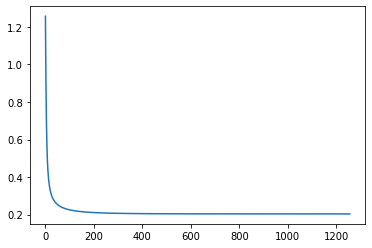

In [67]:
x_axis = np.arange(0,len(losses),1)
sns.lineplot(x=x_axis,y=losses);

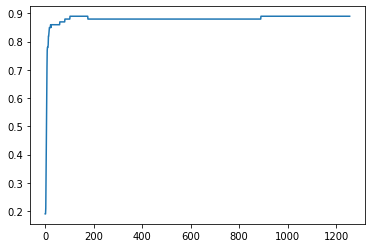

In [68]:
x_axis = np.arange(0,len(losses),1)
sns.lineplot(x=x_axis,y=accuracy);

- 4) Predecir si un estudiante con notas de (63, 55) va a aprobar.

In [73]:
y_prob = model_parcialitos.predict(scaler.transform([[63,55]])) 
int(y_prob > 0)

0

Ergo, el nuestra predicción nos dice que el alumno no va a aprobar

- 5) Hacer un scatter plot con los datos, ploteando las dos clases con colores diferentes
y denotanto las etiquetas en el gráfico. Superponer sobre el mismo la frontera de
decisión.

In [83]:
w,b = model_parcialitos.get_weights()
w

array([[3.9597278],
       [3.6931462]], dtype=float32)

In [124]:
denormalize = lambda x,mu,sigma: sigma*x + mu
mu_nota_1 = np.mean(dataset["nota_primer_parcialito"])
mu_nota_2 = np.mean(dataset["nota_segundo_parcialito"])
sigma_nota_1 = np.std(dataset["nota_primer_parcialito"])
sigma_nota_2 = np.std(dataset["nota_primer_parcialito"])

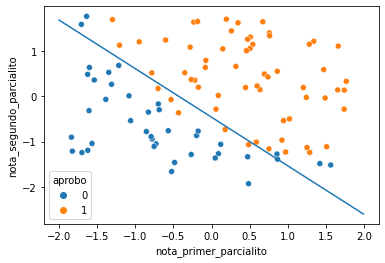

In [128]:
dataset_norm = dataset.copy()
dataset_norm[["nota_primer_parcialito", "nota_segundo_parcialito"]] = norm_inputs
x_2 = lambda x_1: float(-(w[0]*x_1 + b)/w[1])
x_axis = np.arange(-2,2,0.01)
y_axis = np.array([x_2(x_1) for x_1 in x_axis])
sns.lineplot(x=x_axis, y=y_axis)
sns.scatterplot( x="nota_primer_parcialito", y="nota_segundo_parcialito", data=dataset_norm, hue='aprobo')